In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale


In [2]:
#Importing stroke excel into pandas;
df_stroke=pd.read_excel('Stroke.xlsx')
df_stroke.head()

,Risk,Age,BloodPressure,Smoker
0,12,57,152,No
1,24,67,163,No
2,13,58,155,No
3,56,86,177,Yes
4,28,59,196,No


In [3]:
#Replacing No and Yes from the Smoker column to 0 and 1's;
df_stroke['Smoker'] = df_stroke['Smoker'].replace({'No':0,'Yes':1})
df_stroke.head()

,Risk,Age,BloodPressure,Smoker
0,12,57,152,0
1,24,67,163,0
2,13,58,155,0
3,56,86,177,1
4,28,59,196,0


In [4]:
#Subsetting predictors for regression equation
stroke_predictors = df_stroke[['Age','BloodPressure','Smoker']].values
stroke_target = df_stroke[['Risk']].values
stroke_predictor_names = ['Age','BloodPressure','Smoker']
X, y = stroke_predictors, stroke_target

In [5]:
#Printing regression values;
LinReg = LinearRegression()

LinReg.fit(X,y)

print(LinReg.intercept_,LinReg.coef_)

[-91.75949844] [[1.07674106 0.25181347 8.73987106]]


y = m1x1 + m2x2 + m3x3 + b 
<br>m1 = Age coefficient
<br>m2 = Blood pressure coefficient
<br>m3 = Smoker status coefficient

y= 1.077x1 + 0.252x2x2 + 8.740x3 -91.759

In [6]:
#Printing correlation score;
print('R2= ',LinReg.score(X,y))

R2=  0.8734868200235466


The Coefficient value of 0.873 suggests that the model explains 87.3% of the risk of having a stroke based on age, blood pressure, and smoker status. This means that the model is a good fit for the data and that it can reliably predict the risk of having a stroke based on these factors.

In [7]:
#Creating new data frame that contains the predicted risk values based out the previous regression formula ;
risk_data= 1.077*df_stroke['Age'] + 0.252*df_stroke['BloodPressure'] +  8.740*df_stroke['Smoker'] -91.759
calculated_risk= pd.DataFrame(risk_data, columns=['Predicted Risk'])
calculated_risk.head()

,Predicted Risk
0,7.934
1,21.476
2,9.767
3,54.207
4,21.176


In [8]:
#Creating new data frame with the true risk in one column  and the another with the predicted risk ;
predicted = df_stroke[['Risk']].join(calculated_risk[['Predicted Risk']])
predicted.head()

,Risk,Predicted Risk
0,12,7.934
1,24,21.476
2,13,9.767
3,56,54.207
4,28,21.176


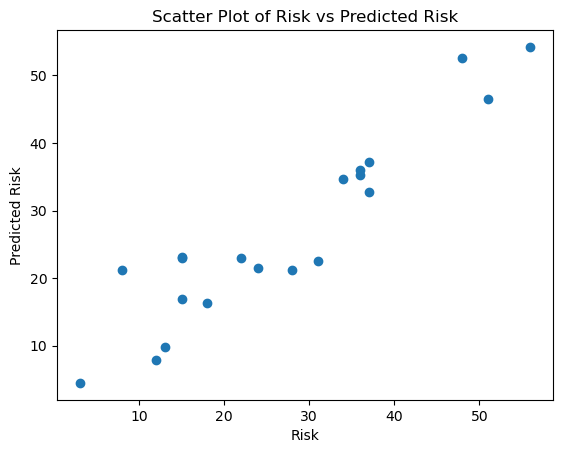

In [9]:
#Plotting scatter diagram of risk and predicted risk;
plt.scatter(predicted['Risk'], predicted['Predicted Risk'])
plt.xlabel('Risk')
plt.ylabel('Predicted Risk')
plt.title('Scatter Plot of Risk vs Predicted Risk')
plt.show()

Based on the scatter plot, it appears that the regression model is not biased, as the predicted risk values are generally close to the actual risk values and there is a clear linear relationship between them.

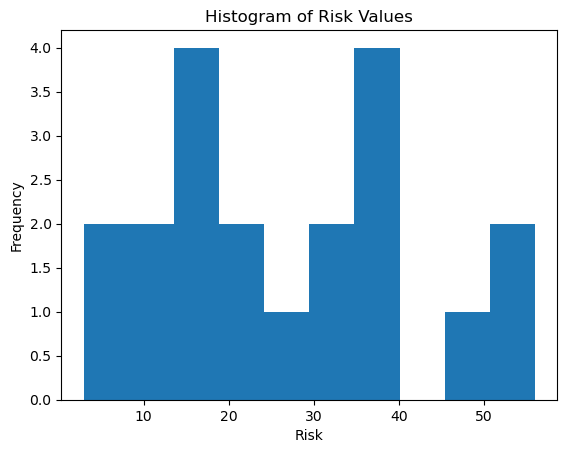

In [10]:
#Plotting histogram of the distribution of the risk of having a stroke
plt.hist(df_stroke['Risk'], bins=10)
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.title('Histogram of Risk Values')
plt.show()

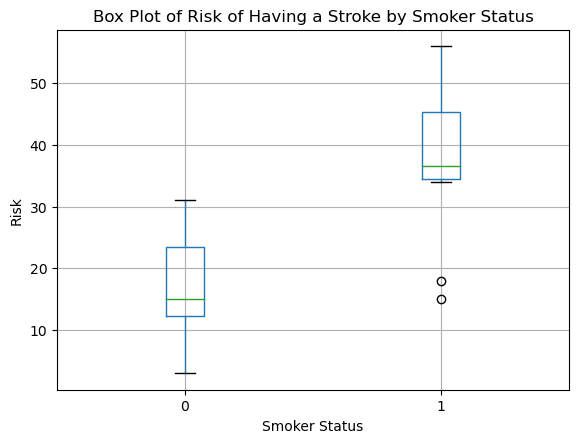

In [11]:
#Plotting box plot of the risk of having a stroke based on smoker status;
df_stroke.boxplot(column='Risk', by='Smoker')
plt.xlabel('Smoker Status')
plt.ylabel('Risk')
plt.title('Box Plot of Risk of Having a Stroke by Smoker Status')
plt.suptitle('')
plt.show()